<a href="https://colab.research.google.com/github/ledyquesada/Ejercicios/blob/main/Semana13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESIÓN AVANZADA


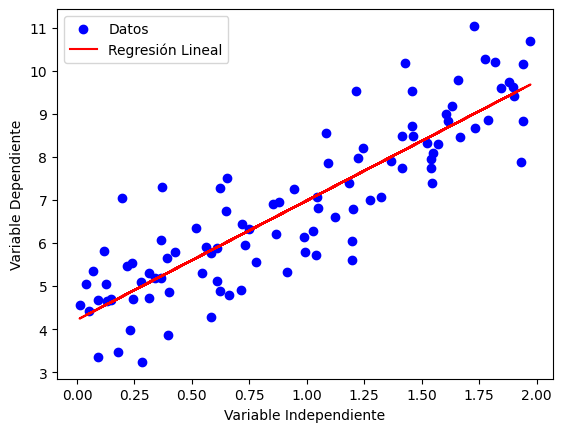

In [1]:
#Ejemplo regresion lineal

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos para una regresión simple
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Ajustar un modelo de regresión lineal ordinaria
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizar la regresión lineal
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, lin_reg.predict(X), color='red', label='Regresión Lineal')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.show()


**EJEMPLO PRÁCTICO**

Ridge MSE: 0.647613237305426
LASSO MSE: 3.4701076528606363


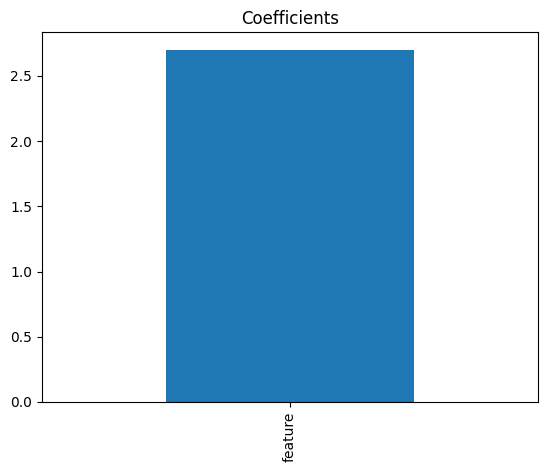

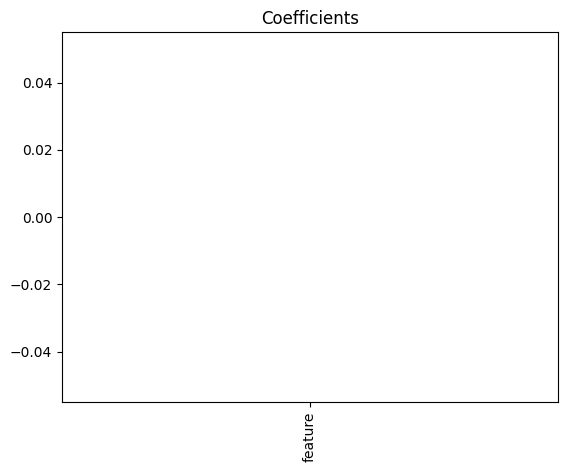

In [2]:
#PASO 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Generar datos simulados
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora, implementamos modelos de Ridge y LASSO y ajustamos los hiperparámetros.

# Modelo Ridge
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la fuerza de la regularización
ridge_model.fit(X_train, y_train)

# Modelo LASSO
lasso_model = Lasso(alpha=1.0)  # El parámetro alpha controla la fuerza de la regularización
lasso_model.fit(X_train, y_train)


#Podemos evaluar el rendimiento de los modelos utilizando métricas como el error cuadrático medio (MSE).
# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

# Evaluar modelos
ridge_mse = evaluate_model(ridge_model, X_test, y_test)
lasso_mse = evaluate_model(lasso_model, X_test, y_test)

print(f'Ridge MSE: {ridge_mse}')
print(f'LASSO MSE: {lasso_mse}')


#Finalmente, podemos visualizar cómo los modelos afectan los coeficientes.
# Función para visualizar coeficientes
def plot_coefficients(model, feature_names):
    coefficients = pd.Series(model.coef_.flatten(), index=feature_names)
    coefficients.plot(kind='bar')
    plt.title('Coefficients')
    plt.show()

# Visualizar coeficientes para Ridge
plot_coefficients(ridge_model, ['feature'])

# Visualizar coeficientes para LASSO
plot_coefficients(lasso_model, ['feature'])


**HIPERPARÁMETROS**

In [ ]:
#BUSQUEDA MANUAL

alphas = [0.1, 1.0, 10.0]
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    mse = evaluate_model(ridge_model, X_val, y_val)
    print(f'Ridge MSE for alpha={alpha}: {mse}')


#BUSQUEDA GRID
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha for Ridge: {best_alpha}')


#CROSS VALIDATION

from sklearn.model_selection import cross_val_score

alphas = [0.1, 1.0, 10.0]
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_mean = -scores.mean()
    print(f'Cross-validated Ridge MSE for alpha={alpha}: {mse_mean}')


**SVM**

In [3]:
#EJEMPLO

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar un conjunto de datos de ejemplo (por ejemplo, Iris)
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear un clasificador SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {accuracy}')


Accuracy of SVM: 1.0
